In [16]:
import matplotlib.pyplot as plt

# Pre-processing function
def process_file(file_path):
    result = []
    with open(file_path, "r") as file:
        for line in file:
            cleaned_line = line.strip().replace("[", "").replace("]", "")
            numbers = [float(num) for num in cleaned_line.split(",")]
            result.append(numbers)
    return result

# Plotting function
def plot_sensor_readings(file_path):

    parts = file_path.split('/')[1].split('_')
    parts[-1] = parts[-1].replace('.txt', '')
    run_type = parts[-1] 
    sensor_id = parts[0]
    # Sensor names and corresponding indices
    sensor_names = {
        "BackL": 0,
        "BackR": 1,
        "FrontL": 2,
        "FrontR": 3,
        "FrontC": 4,
        "FrontRR": 5,
        "BackC": 6,
        "FrontLL": 7,
    }

    # Predefined colours for each sensor
    sensor_colours = {
        "BackL": "red",
        "BackR": "green",
        "FrontL": "orange",
        "FrontR": "purple",
        "FrontC": "blue",  
        "FrontRR": "cyan",
        "BackC": "brown",
        "FrontLL": "pink",
    }

    sensor_dir = {
        'FrontC' : 'frontal',
        'BackC' : 'rear'
    }

    # Process the file to get data
    data = process_file(file_path)

    # Transpose the data to access readings by sensor
    sensor_data = list(zip(*data))  # Each sublist corresponds to a sensor

    # Plot all sensor readings in one figure
    plt.figure(figsize=(12, 8))
    for sensor_name, index in sensor_names.items():
        alpha_value = 1.0 if sensor_name == sensor_id else 0.3  # Full opacity for 'FrontC', semi-transparent for others
        plt.plot(sensor_data[index], marker="o", label=sensor_name, color=sensor_colours[sensor_name], alpha=alpha_value)

    # Add a horizontal line at y=200
    plt.axhline(y=200, color="black", linestyle="--", linewidth=1, label="Threshold")

    # Add labels, title, legend, and grid
    plt.xlabel("Sample Index")
    plt.ylabel("Sensor Readings")
    plt.title(f"{run_type} sensor readings when detecting {sensor_dir[sensor_id]} obstruction")
    plt.legend(loc="upper left", title="Sensors")
    plt.grid(True)

    # Show the plot
    plt.savefig(f"plots/{sensor_dir[sensor_id]}_{run_type}.png")
    plt.show()


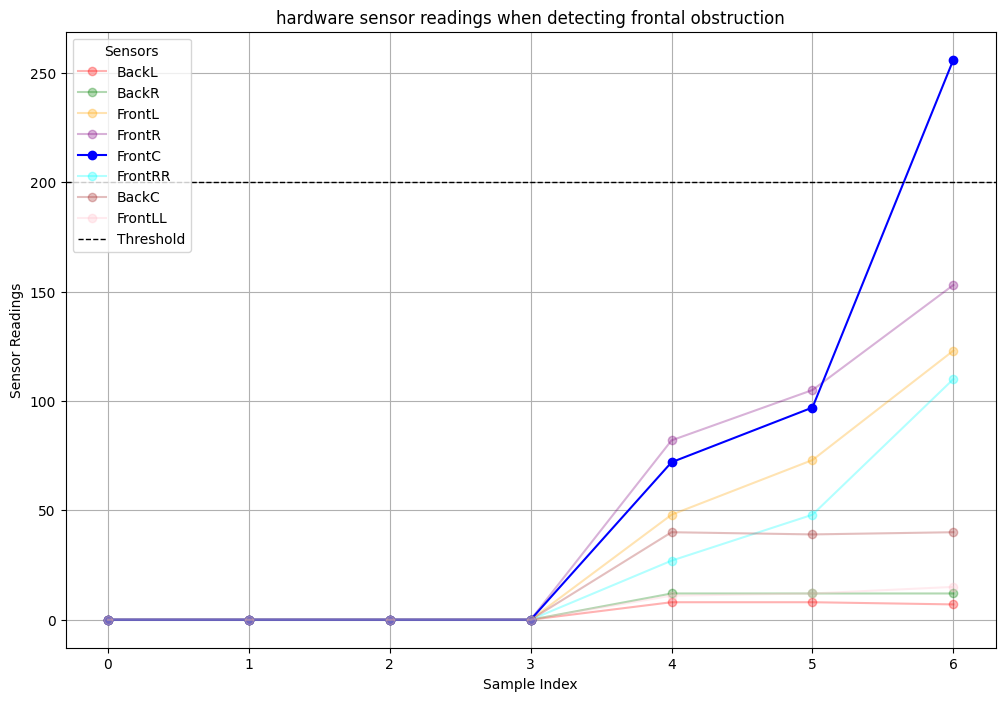

In [18]:
file_path = "readings/FrontC_readings_hardware.txt"
plot_sensor_readings(file_path)